In [2]:
# # Glitch information and data files from Gravity Spy

# The Gravity spy database is available on Zenodo.
# * https://zenodo.org/record/5649212#.Y46Cty-B1OM (The instructions below are from this link.)
# * https://zenodo.org/record/1476551#.Y46Cni-B1OP
#
# The database is in the form of downloadable CSV files, available from the first link, corresponding to different detector and observation run combinations.
#
# * Note: Do not commit this notebook to Git, but the corresponding .py script that is created each time this notebook is saved (checkpointed). Use the save icon in the ribbon for checkpointing.

import gwpy
from gwpy.table import GravitySpyTable
import math
#import urllib.request
#The 'requests' module is more friendly than the urllib.request module
import requests
import wget
import json
import h5py
from urllib.parse import urlparse
from pathlib import Path
import matplotlib
import matplotlib.pyplot as pyplot

In [3]:
#Detector name; Choices: H1, L1
detector = 'H1'
#Observation run; Choices: O1, O2, O3a, O3b
obsRun = 'O2'
dataBasePath = '/Users/kqa493/Desktop/GLITCH'
dataBaseFile = detector+'_'+obsRun+'.csv'
dataBaseContent = GravitySpyTable.read(dataBasePath+'/'+dataBaseFile)
print(type(dataBaseContent))
print(dataBaseContent.colnames)

<class 'gwpy.table.gravityspy.GravitySpyTable'>
['event_time', 'ifo', 'peak_time', 'peak_time_ns', 'start_time', 'start_time_ns', 'duration', 'peak_frequency', 'central_freq', 'bandwidth', 'channel', 'amplitude', 'snr', 'q_value', 'gravityspy_id', '1400Ripples', '1080Lines', 'Air_Compressor', 'Blip', 'Chirp', 'Extremely_Loud', 'Helix', 'Koi_Fish', 'Light_Modulation', 'Low_Frequency_Burst', 'Low_Frequency_Lines', 'No_Glitch', 'None_of_the_Above', 'Paired_Doves', 'Power_Line', 'Repeating_Blips', 'Scattered_Light', 'Scratchy', 'Tomte', 'Violin_Mode', 'Wandering_Line', 'Whistle', 'ml_label', 'ml_confidence', 'url1', 'url2', 'url3', 'url4']


In [4]:
# The columns in the CSV files contain the quantities below.
#
# ‘event_time’, ‘ifo’, ‘peak_time’, ‘peak_time_ns’, ‘start_time’, ‘start_time_ns’, ‘duration’, ‘peak_frequency’, ‘central_freq’, ‘bandwidth’, ‘channel’, ‘amplitude’, ‘snr’, ‘q_value’ contain metadata about the signal from the Omicron pipeline. 
#
# ‘gravityspy_id’ is the unique identifier for each glitch in the dataset. 
#
# the column names ‘1400Ripples’, ‘1080Lines’, ‘Air_Compressor’, ‘Blip’, ‘Chirp’, ‘Extremely_Loud’, ‘Helix’, 
#‘Koi_Fish’, ‘Light_Modulation’, ‘Low_Frequency_Burst’, ‘Low_Frequency_Lines’, ‘No_Glitch’, ‘None_of_the_Above’, 
#‘Paired_Doves’, ‘Power_Line’, ‘Repeating_Blips’, ‘Scattered_Light’, ‘Scratchy’, ‘Tomte’, ‘Violin_Mode’, 
#‘Wandering_Line’, and ‘Whistle’ are Gravity Spy class names for glitches. 

#Each column contains the machine learning confidence for a glitch being in that named class. 
#The sum of all the confidence values should sum to unity. 
#
# ‘ml_label’, ‘ml_confidence’ contain the machine learning predicted labels for the glitches and the associated machine learning confidences in their classification. The 'ml_confidence' value for a glitch is the maximum machine learning confidence across all the Gravity Spy class names listed above. The 'ml_label' entry is simply the associated Gravity Spy class name.

In [54]:
# ## Glitch class and selection criteria

glitchClass = 'Air_Compressor'
ml_confidence_threshold = 0.80

extractTable = dataBaseContent[(dataBaseContent["ml_label"] == glitchClass) & (dataBaseContent["ml_confidence"] > ml_confidence_threshold)]
print(extractTable['event_time', 'start_time', 'start_time_ns', 'duration', 'snr', 'ml_confidence'])

   event_time    start_time start_time_ns duration       snr        ml_confidence 
---------------- ---------- ------------- -------- ---------------- --------------
1168043888.60938 1168043888     500000000      4.0 7.62859010696411 0.931653141975
1175690460.34375 1175690460             0    0.625          7.83551 0.992492437363
1181377817.29688 1181377816     625000000    1.125         18.19544 0.846429765224
1171384737.64844 1171384737     437500000    0.625 8.16009044647217  0.94430321455
1175172446.35156 1175172446     125000000    0.625          8.85488 0.894140958786
1176947165.50781 1176947165     250000000      0.5          8.94014 0.844712853432
1165891243.09375 1165891242     875000000      0.5 7.65559005737305 0.927055537701
1178175243.65625 1178175243     125000000    0.875          8.94958 0.948795795441
 1174729970.5625 1174729970     250000000    0.625           8.2936 0.917154073715
 1164604070.4375 1164604070             0    0.875 10.3290500640869   0.8004078269
1181

In [55]:
# We can do more refined cuts on the above table, such as pick the loudest glitch. 

snr = list(extractTable['duration'])
indxMaxSnr = snr.index(max(snr))
print(extractTable['event_time', 'start_time', 'start_time_ns', 'duration', 'snr', 'ml_confidence'][indxMaxSnr])

   event_time    start_time start_time_ns duration       snr        ml_confidence 
---------------- ---------- ------------- -------- ---------------- --------------
1168043888.60938 1168043888     500000000      4.0 7.62859010696411 0.931653141975


In [56]:
snrSort = sorted(snr,reverse=True)
# dur_snr_sort = sorted()
for k in range(0,10):
    indxSortSnr = snr.index(snrSort[k]);
    print(extractTable['event_time', 'start_time', 'start_time_ns', 'duration', 'snr', 'ml_confidence'][indxSortSnr])

   event_time    start_time start_time_ns duration       snr        ml_confidence 
---------------- ---------- ------------- -------- ---------------- --------------
1168043888.60938 1168043888     500000000      4.0 7.62859010696411 0.931653141975
   event_time    start_time start_time_ns duration       snr        ml_confidence 
---------------- ---------- ------------- -------- ---------------- --------------
1170722101.34375 1170722101             0      1.5 8.02805995941162 0.845760345459
   event_time    start_time start_time_ns duration   snr    ml_confidence 
---------------- ---------- ------------- -------- -------- --------------
1181377817.29688 1181377816     625000000    1.125 18.19544 0.846429765224
   event_time    start_time start_time_ns duration   snr   ml_confidence 
---------------- ---------- ------------- -------- ------- --------------
1178175243.65625 1178175243     125000000    0.875 8.94958 0.948795795441
   event_time    start_time start_time_ns duration   sn

In [57]:
omgScanIndx = snr.index(snrSort[0])
print(extractTable['event_time', 'start_time', 'start_time_ns', 'duration', 'snr', 'ml_confidence'][omgScanIndx])
print(extractTable['url4'][omgScanIndx])

   event_time    start_time start_time_ns duration       snr        ml_confidence 
---------------- ---------- ------------- -------- ---------------- --------------
1168043888.60938 1168043888     500000000      4.0 7.62859010696411 0.931653141975
https://panoptes-uploads.zooniverse.org/production/subject_location/be56ff50-44d7-4c4d-b1e0-cf111a298eda.png


In [58]:

# ## Data retrieval
# One can use GPS information above for any given glitch and go to the GWOSC website to retrieve the corresponding HDF5 data file. In the GWOSC website, under 'Data', use the web form to enter the detector name, the observation run, and the GPS time. 
#
# We can also fetch the GWOSC data file for a glitch directly.

glitchStrtTime = extractTable['start_time'][omgScanIndx]
#Construct URL query to GWOSC for JSON string
urlStr = 'https://www.gw-openscience.org/archive/links/'+obsRun+'_4KHZ_R1/'+detector+'/'+str(glitchStrtTime)+'/'+str(glitchStrtTime+10)+'/json/'

In [59]:
resp = requests.get(urlStr)
print(resp.text)

{
  "dataset": "O2_4KHZ_R1",
  "GPSstart": 1168043888,
  "GPSend": 1168043898,
  "strain": [
    {
      "GPSstart": 1168039936,
      "UTCstart": "2017-01-09T23:31:58",
      "detector": "H1",
      "sampling_rate": 4096,
      "duration": 4096,
      "format": "hdf5",
      "url": "https://gwosc.org/archive/data/O2_4KHZ_R1/1167065088/H-H1_GWOSC_O2_4KHZ_R1-1168039936-4096.hdf5",
      "min_strain": -1.38095212499713e-18,
      "max_strain": 1.37258498942372e-18,
      "mean_strain": -4.21690745064202e-23,
      "stdev_strain": 5.39059014990845e-19,
      "duty_cycle": 19.091796875,
      "BLRMS200": 8.39691280187543e-24,
      "BLRMS1000": 2.02648833261369e-21,
      "BNS": 61.4322470275841
    },
    {
      "GPSstart": 1168039936,
      "UTCstart": "2017-01-09T23:31:58",
      "detector": "H1",
      "sampling_rate": 4096,
      "duration": 4096,
      "format": "gwf",
      "url": "https://gwosc.org/archive/data/O2_4KHZ_R1/1167065088/H-H1_GWOSC_O2_4KHZ_R1-1168039936-4096.gwf",
    

In [60]:
#Get data file url
jsonObj = json.loads(resp.text)
#The HDF5 url is in the first element of the list type value associated with the key called "strain"
print(jsonObj['strain'][0]['url'])

https://gwosc.org/archive/data/O2_4KHZ_R1/1167065088/H-H1_GWOSC_O2_4KHZ_R1-1168039936-4096.hdf5


In [61]:
fileURL = jsonObj['strain'][0]['url']
path = '/Users/kqa493/Desktop/GLITCH/GlitchFiles/AirCompressor'
respFile = wget.download(fileURL, out = path)

100% [........................................................................] 25470489 / 25470489

In [62]:
#Get the downloaded file's name 
downloadFilePath  = urlparse(fileURL).path
downloadFileName = Path(downloadFilePath).stem

In [63]:
downloadFileName

'H-H1_GWOSC_O2_4KHZ_R1-1168039936-4096'

In [64]:
#Read the strain data and make a plot
fileHndl = h5py.File(path + '/'+ downloadFileName+'.hdf5')
strainDset = fileHndl['strain/Strain']

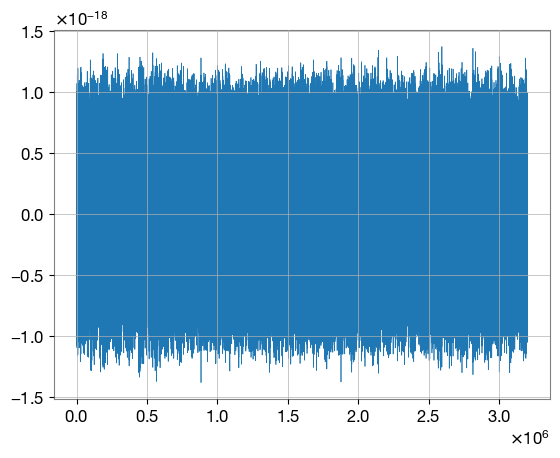

In [65]:
fig, ax = pyplot.subplots()
pyplot.plot(strainDset[:], linewidth=0.5)
pyplot.show()

In [36]:
5949-4688


1261